# **Análisis de distribución de precios**

In [1]:
# Módulos

import pandas as pd
import json
import gzip
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Carga de datos a DataFrame

Versión no generalizada (Poner tu identificador del dataset), las salidas e interpretaciones tienen que ser cambiadas cuando trabajemos con el dataset entero

In [29]:
df = pd.read_parquet('../../data/games_info.parquet')
df.head(5)

,id,name,required_age,short_description,price_overview,supported_languages,developers,publishers,categories,genres,release_date,free,price_range,recomendaciones_positivas,recomendaciones_negativas,recomendaciones_totales
0,3596240,Assault Armored Girls War Vasileia,0,This is a 3D action game in which you take wea...,9.75,"[English, Japanese]",studio core,studio core,"[Single-player, Multi-player, Full controller ...",[Action],2025-05-01,False,"[5.00,9.99]",12,5,17
1,3596280,The Nursing,0,On your first day working as a caregiver in on...,1.99,[English],Kinggi,Kinggi,"[Single-player, Family Sharing]","[Action, Indie]",2025-04-05,False,"[0.01,4.99]",0,1,1
2,3596370,Bearly Escape,0,Bearly Escape is a fast-paced VR action advent...,19.50,"[English, Simplified Chinese]",Time Traveller,Time Traveller,"[Single-player, Steam Achievements, VR Only, F...","[Adventure, Casual, Simulation]",2025-07-10,False,"[15.00,19.99]",1,0,1
3,3596410,Rock and Scroll,0,Embark on a journey where a cursed soul steers...,7.67,[English],Fowlplay,Fowlplay,"[Single-player, Steam Achievements, Custom Vol...","[Adventure, Casual, Indie]",2025-12-03,False,"[5.00,9.99]",15,1,16
4,3596510,Taking London,0,A love letter to old-school browser-based RTS ...,2.99,[English],Pink Pegasus Games,Pink Pegasus Games,"[Multi-player, MMO, PvP, Online PvP, Co-op, On...","[Massively Multiplayer, Strategy]",2025-04-24,False,"[0.01,4.99]",24,3,27


<!-- Ahora, vamos a agrupar los juegos por rangos de precio para trabajar más fácilmente con las gráficas -->

# Gráficos + Conclusiones

#### Pie Chart de rango de precios

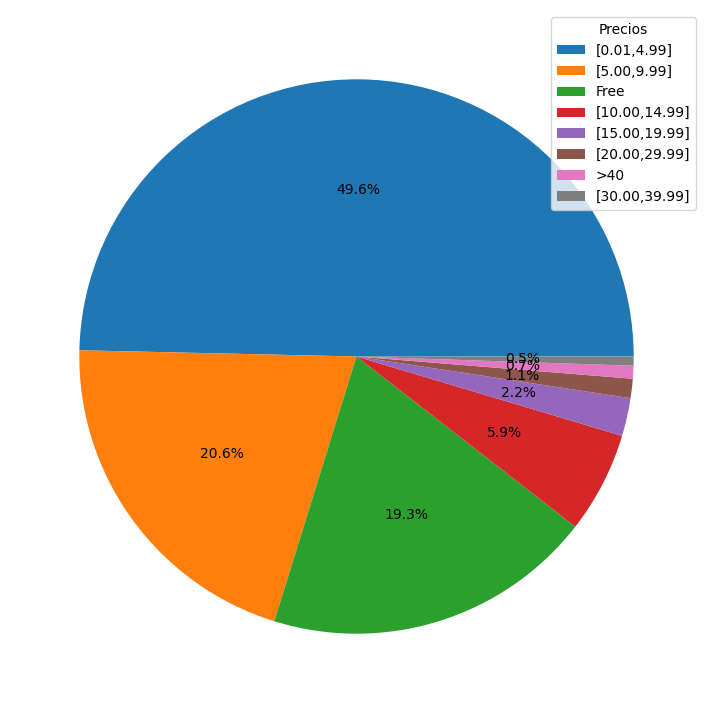

In [30]:
plt.figure(figsize=(9,9))
plt.pie(x=df['price_range'].value_counts(),  autopct='%1.1f%%')
plt.legend(df['price_range'].value_counts().index, title='Precios', loc='best')
plt.show()

#### Histograma de precios con transformación logarítmica

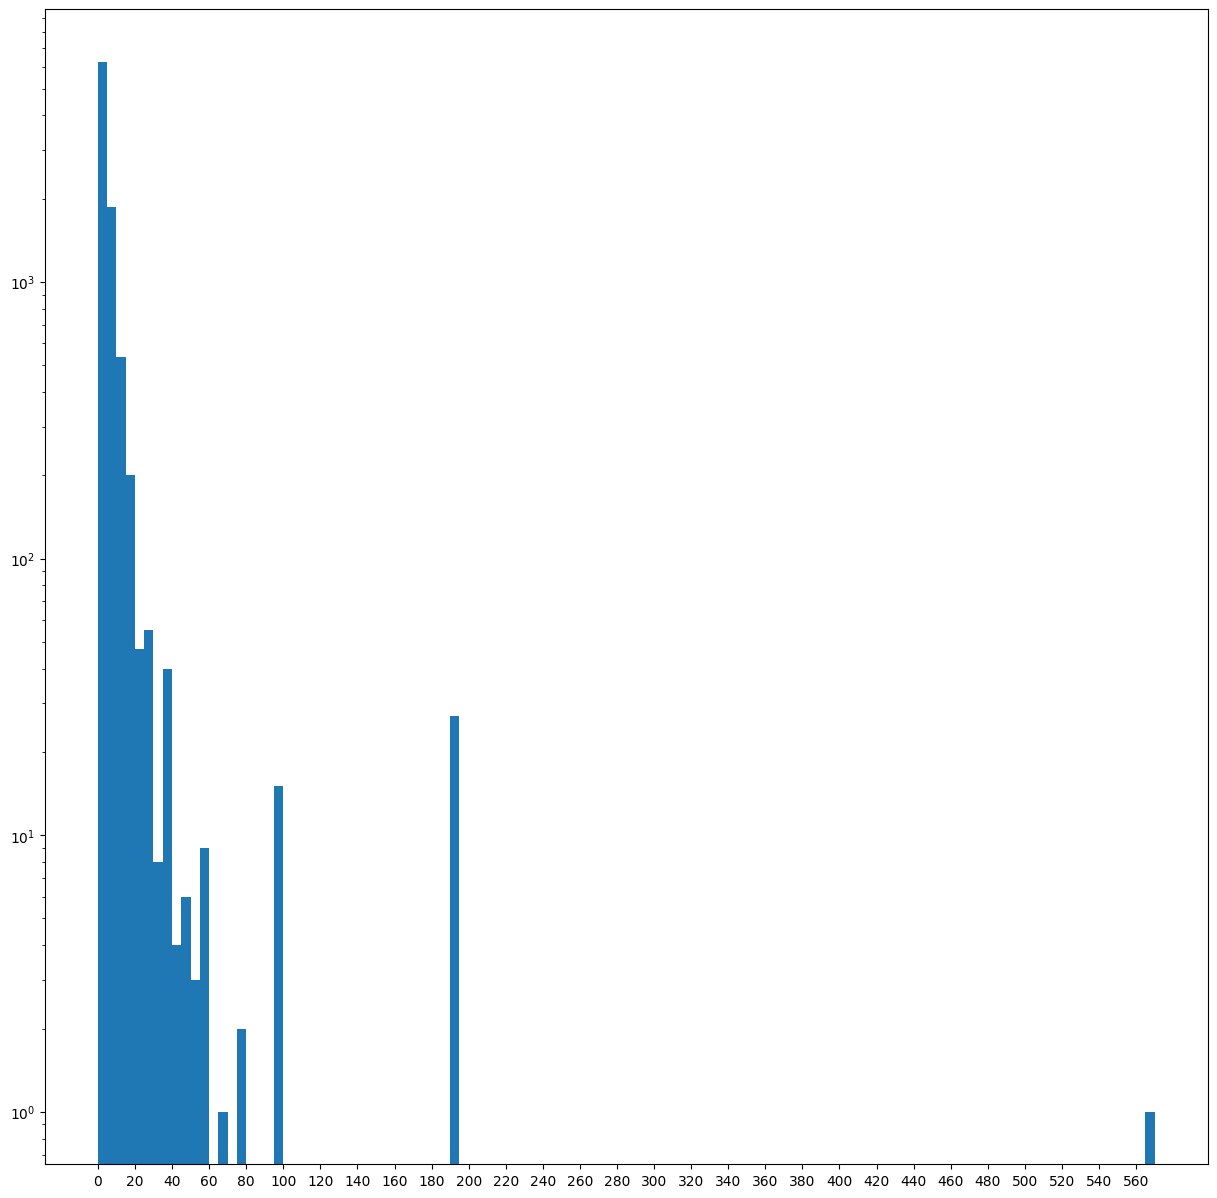

In [31]:
bins_range = np.arange(df['price_overview'].min(), df['price_overview'].max() + 5, 5) # Bins van de 5 en 5 

plt.figure(figsize=(15,15))
plt.hist(x=df['price_overview'], log=True, bins= bins_range)
plt.xticks(np.arange(0, df['price_overview'].max() + 5, 20))
plt.show()

Se puede observar que  mayoría de juegos son tienen un precio menor de 20€, seguido por los juegos gratuitos, juegos con precio menor de 40€ y por último juegos con precio mayor a 40€.

Esto se debe principalmente a que la mayoría de juegos de Steam son públicados bajo desarrolladores Indie, los cuales suelen ser juegos con precio menor de 20€.

Se observa que hay juegos con precio mayor de 100€ e incluso alguno con precio mayor de 500€

- - - 

#### Pie Chart de la distribución de los géneros de cada rango de precios.

In [32]:
df['price_range'].unique()

<ArrowStringArray>
[  '[5.00,9.99]',   '[0.01,4.99]', '[15.00,19.99]',          'Free',
 '[10.00,14.99]', '[20.00,29.99]', '[30.00,39.99]',           '>40']
Length: 8, dtype: str

In [27]:
df["genres"] = df["genres"].apply(lambda x: x.replace("[", ""))
df["genres"] = df["genres"].apply(lambda x: x.replace("]", ""))
df["genres"] = df["genres"].apply(lambda x: x.replace("\n", ""))
df["genres"] = df["genres"].apply(lambda x: x.replace(",", ""))
df["genres"] = df["genres"].apply(lambda x: x.split(" "))
df.head(5)

,id,name,required_age,short_description,price_overview,supported_languages,developers,publishers,categories,genres,release_date,free,price_range,recomendaciones_positivas,recomendaciones_negativas,recomendaciones_totales
0,3596240,Assault Armored Girls War Vasileia,0,This is a 3D action game in which you take wea...,9.75,"['English', 'Japanese']",studio core,studio core,"['Single-player', 'Multi-player', 'Full contro...",['Action'],2025-05-01,False,"[5.00,9.99]",12,5,17
1,3596280,The Nursing,0,On your first day working as a caregiver in on...,1.99,['English'],Kinggi,Kinggi,"['Single-player', 'Family Sharing']","['Action', 'Indie']",2025-04-05,False,"[0.01,4.99]",0,1,1
2,3596370,Bearly Escape,0,Bearly Escape is a fast-paced VR action advent...,19.50,"['English', 'Simplified Chinese']",Time Traveller,Time Traveller,"['Single-player', 'Steam Achievements', 'VR On...","['Adventure', 'Casual', 'Simulation']",2025-07-10,False,"[15.00,19.99]",1,0,1
3,3596410,Rock and Scroll,0,Embark on a journey where a cursed soul steers...,7.67,['English'],Fowlplay,Fowlplay,"['Single-player', 'Steam Achievements', 'Custo...","['Adventure', 'Casual', 'Indie']",2025-12-03,False,"[5.00,9.99]",15,1,16
4,3596510,Taking London,0,A love letter to old-school browser-based RTS ...,2.99,['English'],Pink Pegasus Games,Pink Pegasus Games,"['Multi-player', 'MMO', 'PvP', 'Online PvP', '...","['Massively, Multiplayer', 'Strategy']",2025-04-24,False,"[0.01,4.99]",24,3,27


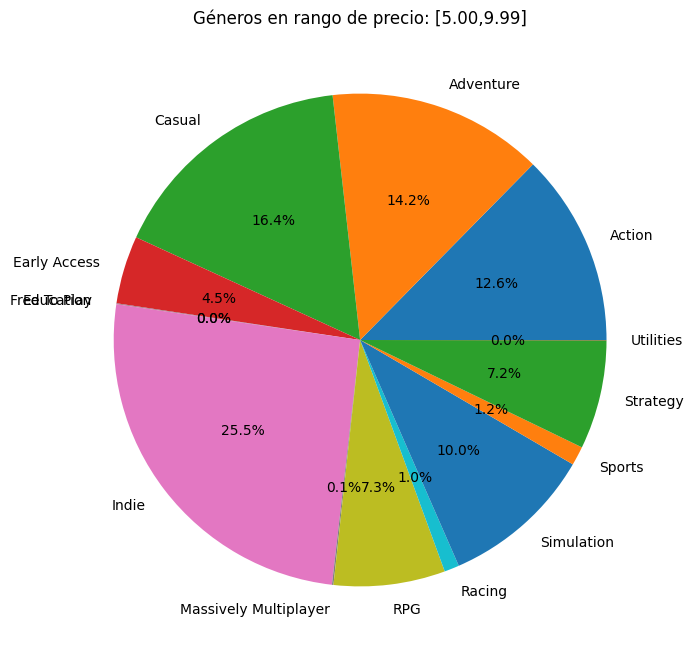

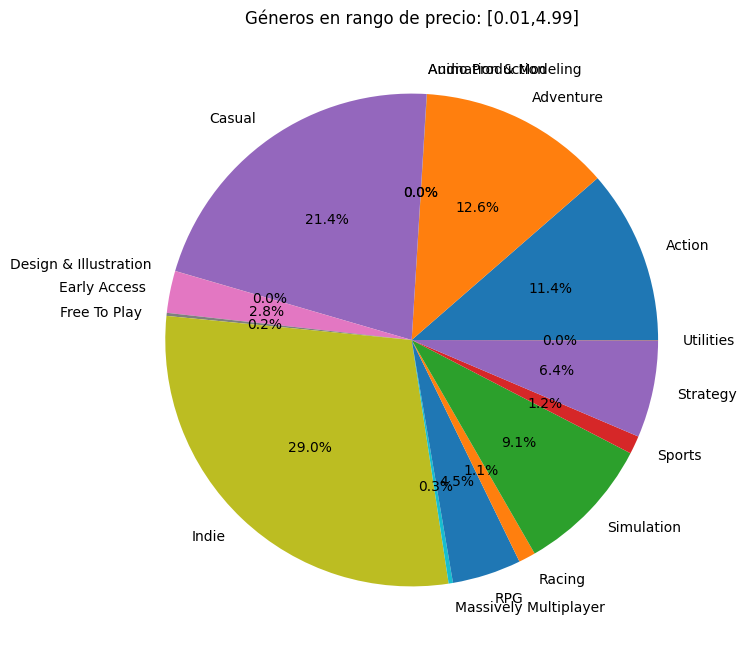

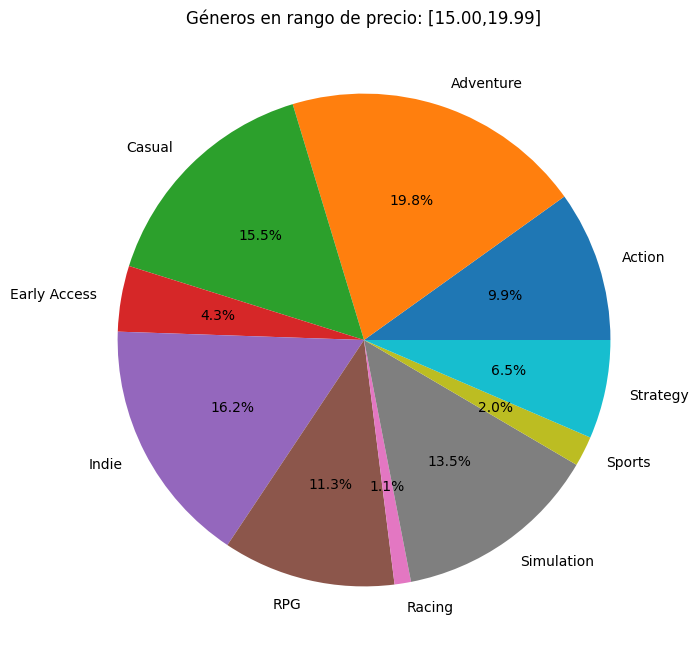

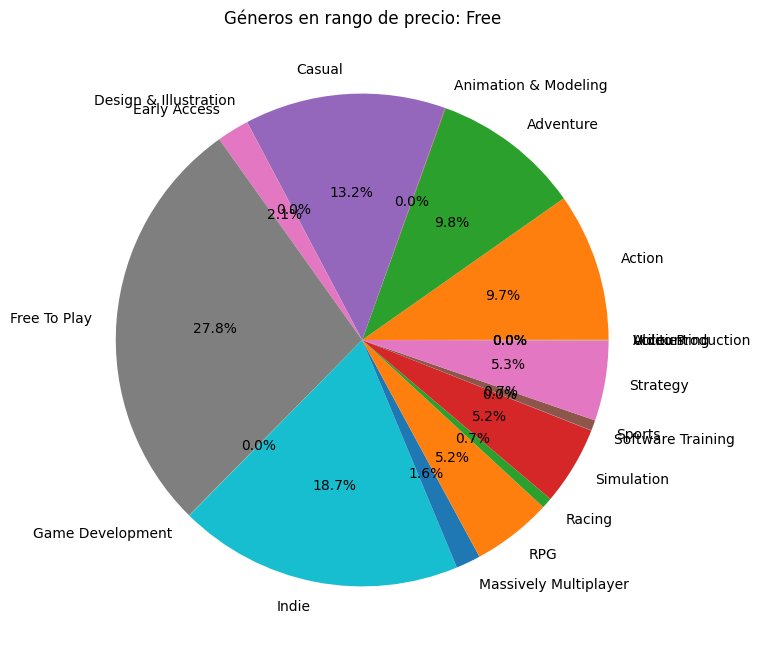

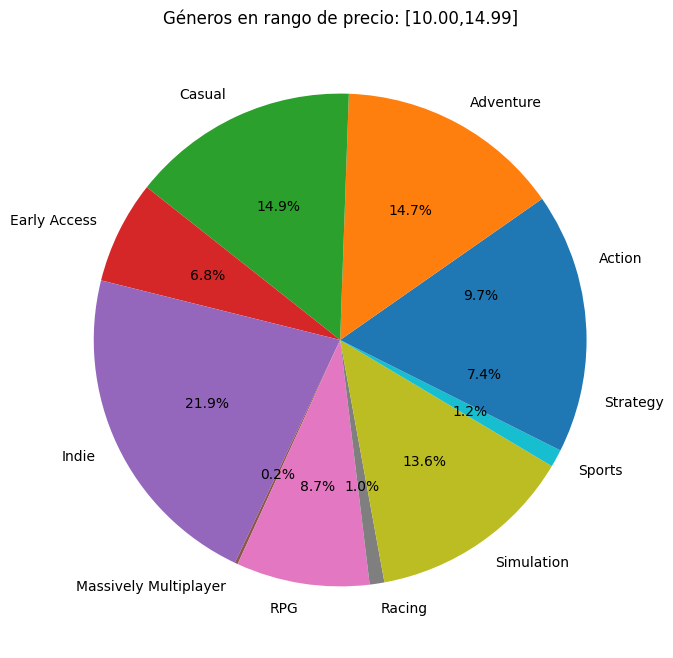

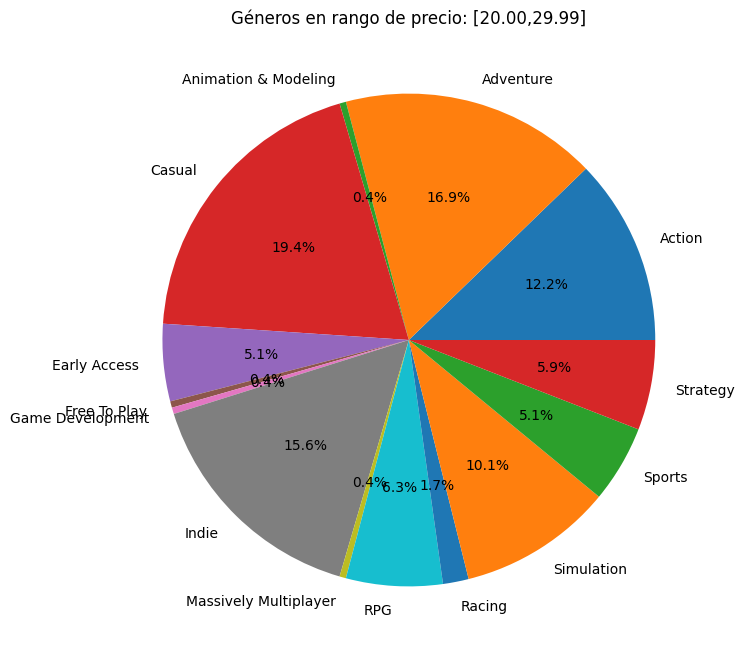

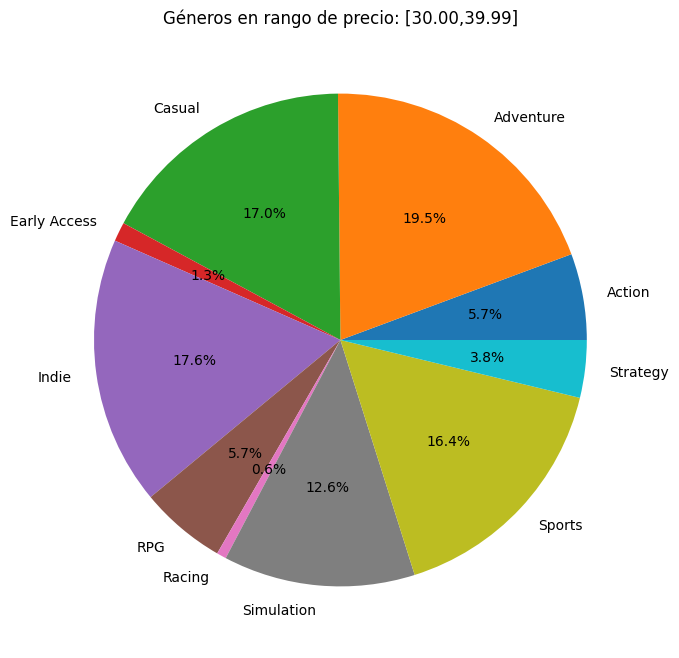

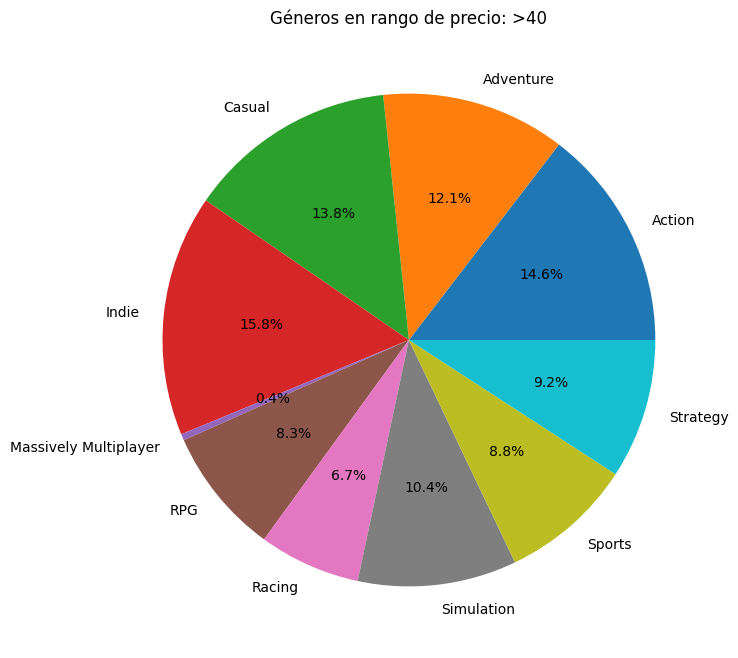

In [33]:
# Por cada genero del array de 'genres', crea una fila por cada miembro del array
df_exploded = df.explode('genres')
df_exploded

# Agrupamos en una tabla los juegos por precio y género
price_genre_counts = df_exploded.groupby(['price_range', 'genres']).size().unstack(fill_value=0)

price_order = df['price_range'].unique()

for price_range in price_order:
    plt.figure(figsize=(8,8))
    genre_counts = price_genre_counts.loc[price_range]
    genre_counts = genre_counts[genre_counts > 0]
    
    plt.pie(
        genre_counts.values,
        labels=genre_counts.index,
        autopct='%1.1f%%',
    )
    plt.title(f'Géneros en rango de precio: {price_range}')

    plt.show()

#### Bar plot de los precios y los géneros

In [ ]:
# Agrupamos los juegos en una tabla por género y precio
genre_price_counts = df_exploded.groupby(['genres', 'price_range']).size().unstack(fill_value=0)

genre_price_counts.plot(kind='barh', figsize=(12,8))

plt.xlabel('Número de juegos')
plt.ylabel('Género')
plt.title('Distribución de precio por género')
plt.legend(title='Precio')
plt.tight_layout()
plt.show()


- - -

Conclusión general: Se observa una distribución de cola larga con alta concentración en los juegos menores de 20 € y estas distribuciones se mantienen en cada género.